# Life Expectancy and GDP

## Introduction

This project will explore the relationship between a country's gross domestic product (GDP) and the average life expectancy of its citizens. This will be accomplished primarily through data visualization techniques following data preparation and a brief glance at the data attributes.

Specifically, this project seeks to answer the following questions:

* Has life expectancy increased over time in the six nations?
* Has GDP increased over time in the six nations?
* Is there a strong correlation between GDP and life expectancy of a country?
* What is the average life expectancy in these nations?
* What is the distribution of that life expectancy?

This data is sourced from the World Bank and World Health Organization in CSV format.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Import Necessary Libraries

The first step is to import the libraries used in this project for data manipulation and visualization.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Load CSV Data

The CSV data, **all_data.csv**, will now be loaded into a DataFrame in order to begin the analysis. A quick inspection of the data to gain a high-level overview will follow.

In [3]:
df = pd.read_csv('all_data.csv')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data Overview

In [5]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
df.shape

(96, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [9]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data Exploration

There are 4 columns and 96 observations in this dataset. The mean life expectancy for all citizens is 72.8 years, while the median is 76.75.

The next step is to explore the unique countries represented in the data and which years are accounted for.

In [11]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [12]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The **Life expectancy at birth (years)** column is unwieldy for coding the plots that will follow. All rows must be checked for missing or null values as well.

In [13]:
df = df.rename({'Life expectancy at birth (years)':'LEABY'}, axis = 'columns')
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [17]:
df.isnull().sum()

Country    0
Year       0
LEABY      0
GDP        0
dtype: int64

There are no missing or null values in the dataset and the **Life expectancy at birth (years)** column has been renamed to **LEABY**. The data is now ready for plotting.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Data Visualizations

The first question, **Has life expectancy increased over time in the six nations?**, can be answered via a line chart.

The first chart plots LEABY against years, with each country as a different hue.

Text(0.5, 1.0, 'Change in Life Expectancy Over Time')

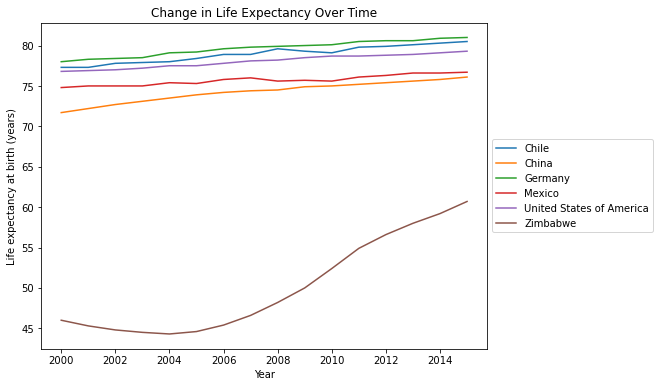

In [22]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('Life expectancy at birth (years)')
plt.title('Change in Life Expectancy Over Time')

Life expectancy has been slowly increasing over time for each country. Zimbabwe is an outlier, dipping to around 45 years old in 2004 and then experiencing a sustained increase to over 60 by 2014.

The next plot features GDP over years, with each country as a hue, in order to investigate whether GDP has been increasing over time for each country.

Text(0.5, 1.0, 'Change in GDP Over Time')

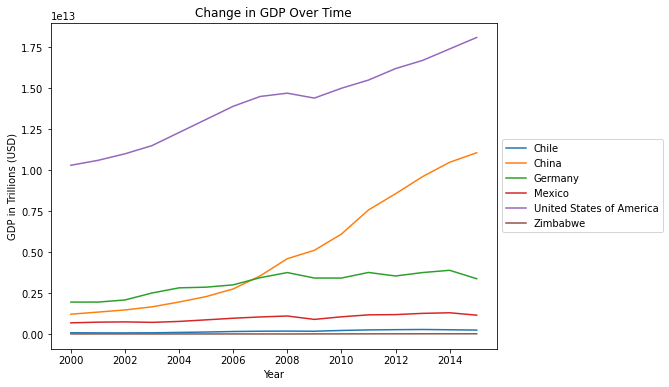

In [24]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('GDP in Trillions (USD)')
plt.title('Change in GDP Over Time')

The United States and China have had the most drastic increases in GDP during the years 2000 - 2015. The other countries have had much more modest gains in GDP. It is harder to visualize Zimbabwe's gains as they are much smaller relative to the other countries. This can be more clearly seen via a data filter.

In [26]:
df.loc[df['Country'] == 'Zimbabwe']

,Country,Year,LEABY,GDP
80,Zimbabwe,2000,46.0,6.689958e+09
81,Zimbabwe,2001,45.3,6.777385e+09
82,Zimbabwe,2002,44.8,6.342116e+09
83,Zimbabwe,2003,44.5,5.727592e+09
84,Zimbabwe,2004,44.3,5.805598e+09
85,Zimbabwe,2005,44.6,5.755215e+09
86,Zimbabwe,2006,45.4,5.443896e+09
87,Zimbabwe,2007,46.6,5.291950e+09
88,Zimbabwe,2008,48.2,4.415703e+09
89,Zimbabwe,2009,50.0,8.621574e+09


The next step is to investigate whether there is a strong correlation between **GDP** and **life expectancy**.

In [27]:
df.corr()

,Year,LEABY,GDP
Year,1.000000,0.155050,0.208288
LEABY,0.155050,1.000000,0.343207
GDP,0.208288,0.343207,1.000000


A brief glance at the correlations chart shows that the relationship between GDP and life expectancy is worth exploring. A scatter plot would present a good visualization of this relationship and whether or not they are higly correlated.

Text(0.5, 1.0, 'Comparing the Relationship between GDP and Life Expectancy')

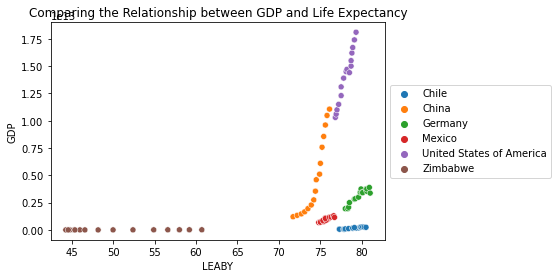

In [29]:
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('Comparing the Relationship between GDP and Life Expectancy')

Most countries appear to exhibit a rise in life expectancy as GDP increases. China and the United States in particular have very steep slopes, indicating a very strong correlation between the two. Zimbabwe's life expectancy has also been increasing, but their GDP seems stagnant. This facet of the chart is worth researching further.

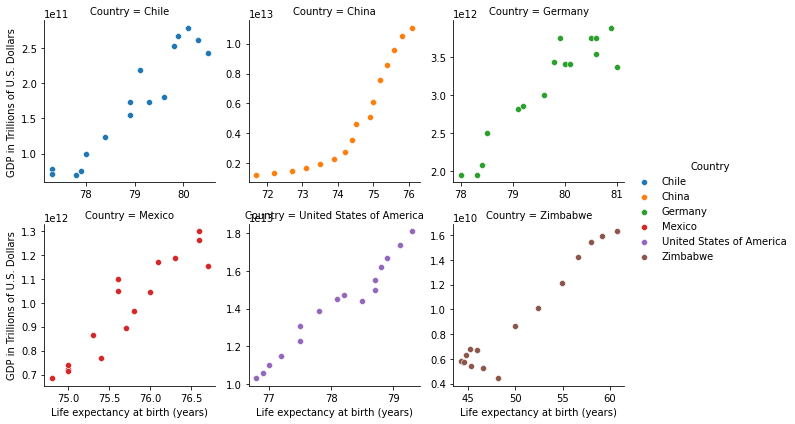

In [30]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

Each country is now broken out into **facets**, which makes it easier to see individual trajectories. Mexico, the United States, and Zimbabwe all exhibit linear relationships between GDP and life expectancy. 

In Zimbabwe's facet, it is more clear than the previous chart that there is a positive correlation between GDP and life expectancy. When GDP stagnated in the early 2000s, so did average life expectancy. When GDP grew continuously, average life expectancy grew as well.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

A **bar chart** is an effective way to visualize the average life expectancy of each country. The following chart shows these mean values.

Text(0.5, 1.0, 'Mean Life Expectancy by Country')

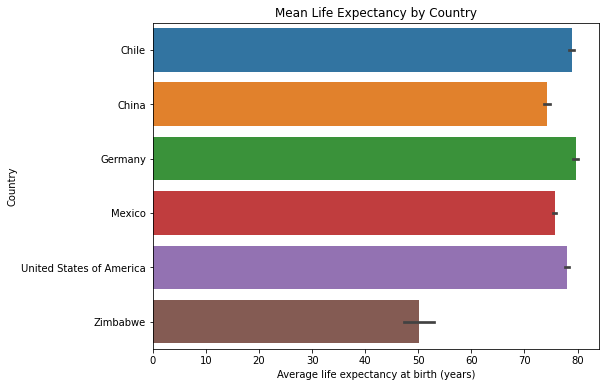

In [32]:
plt.figure(figsize=(8, 6))
sns.barplot(x='LEABY', y='Country', data=df)
plt.xlabel('Average life expectancy at birth (years)')
plt.title('Mean Life Expectancy by Country')

Every country has a mean life expectancy between the mid-to-high 70s except for Zimbabwe. This will likely skew the distribution plot below.

**Distribution plots** are effective way of showing how many observations are grouped together and effectively identifies outliers.

Text(0.5, 1.0, 'Distributions of Life Expectancy')

<Figure size 576x432 with 0 Axes>

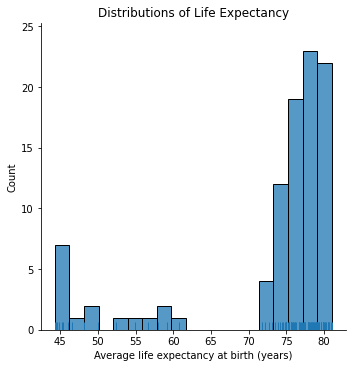

In [37]:
plt.figure(figsize=(8, 6))
sns.displot(df.LEABY, rug = True, kde = False)
plt.xlabel('Average life expectancy at birth (years)')
plt.title('Distributions of Life Expectancy')

The distribution of values for life expectancy are heavily skewed to the left, meaning that most observations are on the right hand side. This is commesurate with our findings on mean life expectancies, with Zimbabwe's observations constituting the bulk of the outliers.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Conclusions

Through the use of various data visualization techniques, this project was able to answer the questions posed in the introduction.

* Has life expectancy increased over time in the six nations?
    * Yes, most countries exhibited a steady increase in life expectancy. Zimbabwe had a marked increase between the years 2006 and 2015.
* Has GDP increased over time in the six nations?
    * GDP has also increased over time for each country, though at differing rates. China's GDP has seen an exponential increase since 2006, while Zimbabwe and Chile's GDP growth have been much less pronounced.
* Is there a strong correlation between GDP and life expectancy of a country?
    * Yes, the scatter plots show a positive correlation between GDP and life expectancy.
* What is the average life expectancy in these nations?
    * Each country except for Zimbabwe had an average life expectancy between the mid and high 70's. Zimbabwe was an outlier with an average life expectancy around 50.
* What is the distribution of that life expectancy?
    * Most observations were concentrated on the right side of the histogram, which means that life expectancy had a left-skew due to Zimbabwe's outlier data.